In [139]:
import pandas as pd

In [140]:
column_names = ["sex", "lenght [mm]", "diameter [mm]", "height [mm]", "whole weight [g]", "shucked weight [g]", "viscera weight [g]", "shell weight [g]", "rings"]

snails_data_all = pd.read_csv("data.csv", names=column_names)

In [141]:
mapping = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}

mapped_sex = snails_data_all['sex'].map(mapping)

counts = mapped_sex.value_counts().rename_axis(None)

df_qualitative_summary = pd.DataFrame({
    'count': counts,
    '%':(counts / counts.sum() * 100).round(2)
})

df_qualitative_summary

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [142]:
quantitative_values = snails_data_all.select_dtypes(include='number')

df_quantitative_summary = pd.DataFrame({
    'mean':quantitative_values.mean().round(2),
    'std':quantitative_values.std().round(2),
    'min':quantitative_values.min().round(2),
    '25%':quantitative_values.quantile(0.25).round(2),
    '50%':quantitative_values.quantile(0.5).round(2),
    '75%':quantitative_values.quantile(0.7).round(2),
    'max':quantitative_values.max().round(2),
})
df_quantitative_summary

,mean,std,min,25%,50%,75%,max
lenght [mm],0.52,0.12,0.08,0.45,0.55,0.60,0.82
diameter [mm],0.41,0.10,0.06,0.35,0.42,0.47,0.65
height [mm],0.14,0.04,0.00,0.12,0.14,0.16,1.13
whole weight [g],0.83,0.49,0.00,0.44,0.80,1.08,2.83
shucked weight [g],0.36,0.22,0.00,0.19,0.34,0.47,1.49
viscera weight [g],0.18,0.11,0.00,0.09,0.17,0.23,0.76
shell weight [g],0.24,0.14,0.00,0.13,0.23,0.31,1.00
rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


<Axes: >

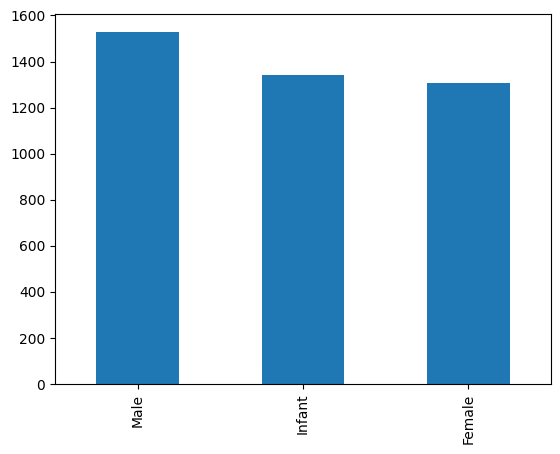

In [143]:
df_qualitative_summary['count'].plot(kind='bar')

array([[<Axes: title={'center': 'lenght [mm]'}>,
        <Axes: title={'center': 'diameter [mm]'}>],
       [<Axes: title={'center': 'height [mm]'}>,
        <Axes: title={'center': 'whole weight [g]'}>],
       [<Axes: title={'center': 'shucked weight [g]'}>,
        <Axes: title={'center': 'viscera weight [g]'}>],
       [<Axes: title={'center': 'shell weight [g]'}>,
        <Axes: title={'center': 'rings'}>]], dtype=object)

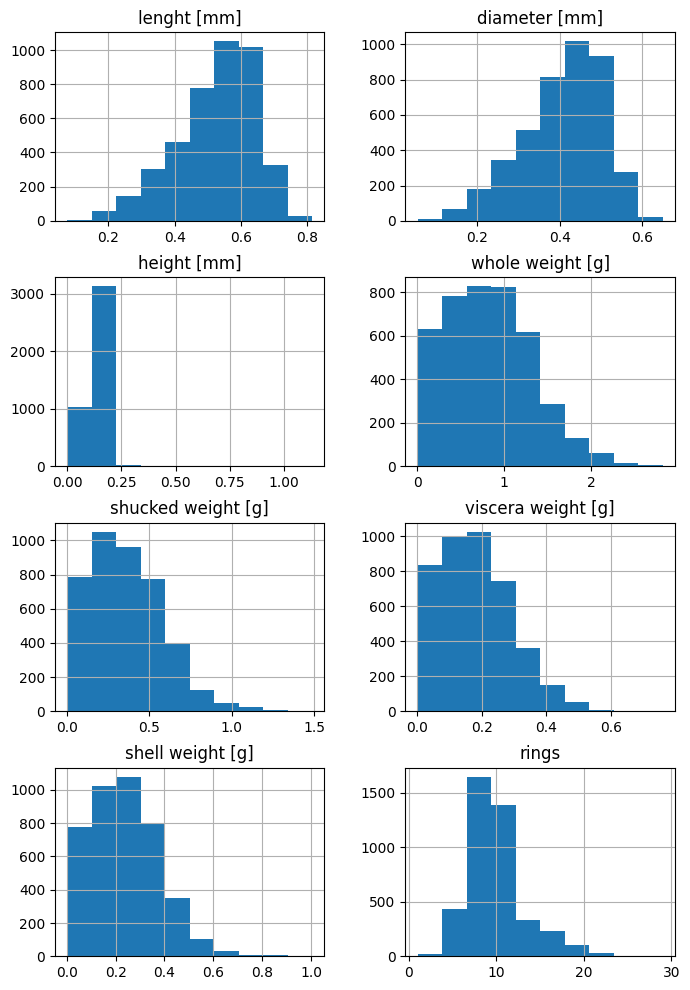

In [144]:
quantitative_values.hist(
    layout=(4, 2),
    figsize=(8, 12)
)